<a href="https://colab.research.google.com/github/divyani95/Crypto/blob/main/Linear_Regression_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Exercises

data_source = "https://www.kaggle.com/datasets/erolmasimov/price-prediction-multiple-linear-regression"

### Let's load the data and understand it

In [2]:
# import all necessary packages
import pandas as pd

In [10]:
df = pd.read_csv('Healthcare-Diabetes.csv')

In [13]:
# check the
df.shape

(2768, 10)

In [12]:
# first five rows of the dataframe
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# describe the dataframe with some statistical info
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [15]:
# check data types in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [16]:
# check unique data for each feature in the dataframe
df.nunique()

,0
Id,2768
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,53
Insulin,187
BMI,253
DiabetesPedigreeFunction,523
Age,52
Outcome,2


In [20]:
# column names of the dataframe
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Now, we can prepare the data for the linear regression model

In [21]:
# create a new simple dataframe using the existing one
new_df = df[['Id', 'Pregnancies', 'Glucose']]
new_df

,Id,Pregnancies,Glucose
0,1,6,148
1,2,1,85
2,3,8,183
3,4,1,89
4,5,0,137
...,...,...,...
2763,2764,2,75
2764,2765,8,179
2765,2766,6,85
2766,2767,0,129


<Axes: xlabel='Id'>

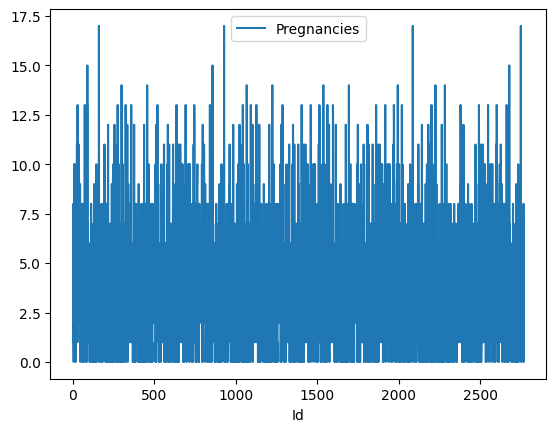

In [24]:
# check the distribution of data by plotting as scatter
new_df.plot(x='Id', y='Pregnancies')

<Axes: xlabel='Id'>

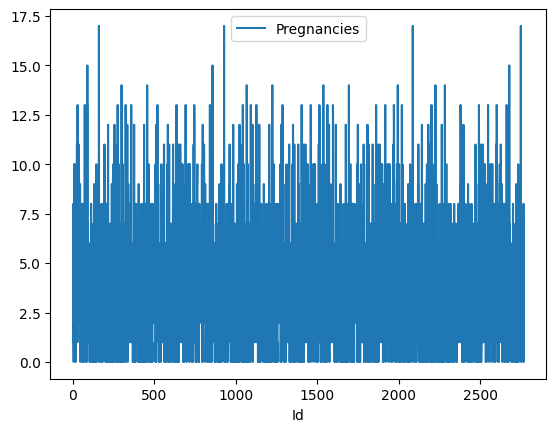

In [25]:
# compare below plot with the previous one
df.plot(x='Id', y='Pregnancies')

In [26]:
# define x and y by using the new dataframe
x = new_df['Id']
y = new_df['Pregnancies']

### Now Machine Learning

In [27]:
# import ML related packages of sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
#shapes of splitted data - sizes of the X_train and Y_train should be same. Also, tests.
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (2214,)
X_test: (554,)
Y_train: (2214,)
Y_test: (554,)


In [30]:
# create a linear regression model
model = LinearRegression()


In [31]:
# train the model using training data
# since we have only one independent variable, you should use 'values.reshape(-1,1)'. Otherwise, x_train is enough.
model.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [32]:
# print coefficient
model.coef_

array([-5.07816706e-05])

In [33]:
# print y_intercept | bias
model.intercept_

3.7697238824993913

In [34]:
# make predictions using test data
y_pred = model.predict(x_test.values.reshape(-1,1))

In [35]:
# let's calculate the metrics
# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)

MSE -->  11.582822769630695


In [36]:
# RMSE
import math
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)

RMSE -->  3.4033546347142103


In [37]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)

MAE -->  2.7796958694740987


In [38]:
# R2
r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

R2 -->  -0.0024794794043403456


In [39]:
# print them all
print("MSE --> ", mse)
print("RMSE --> ", rmse)
print("MAE --> ", mae)
print("R2 --> ", r2)

MSE -->  11.582822769630695
RMSE -->  3.4033546347142103
MAE -->  2.7796958694740987
R2 -->  -0.0024794794043403456


In [40]:
# import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Predicted')

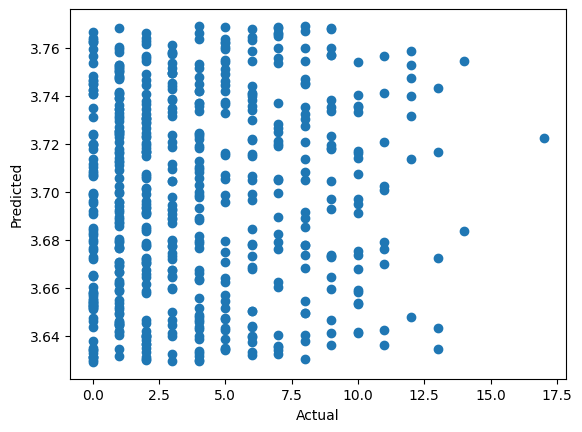

In [41]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Id', ylabel='Pregnancies'>

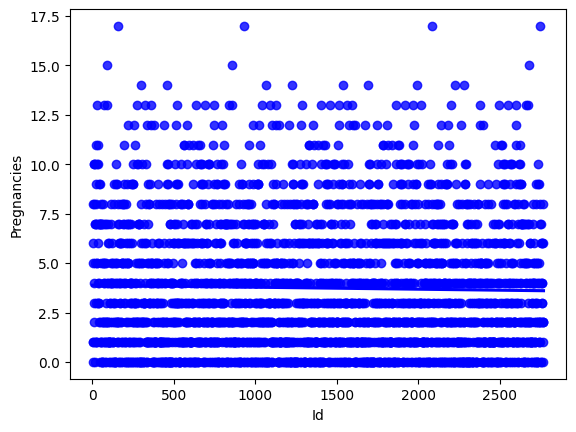

In [42]:
# plot regression model line
sns.regplot(x=x, y=y, ci=None, color ='blue')

### What about other independent variables?

<Axes: xlabel='Id'>

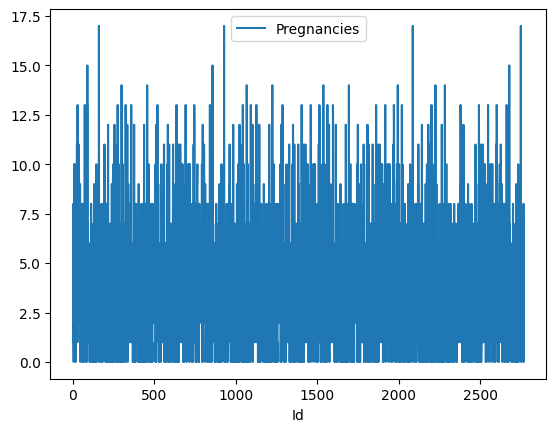

In [68]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Now plot the data
df.plot(x='Id', y='Pregnancies')


In [53]:
# new x will be X1 and X2
x = df[['Id', 'Pregnancies']]
x

,Id,Pregnancies
0,1,6
1,2,1
2,3,8
3,4,1
4,5,0
...,...,...
2763,2764,2
2764,2765,8
2765,2766,6
2766,2767,0


In [54]:
# y will be same
y

,Pregnancies
0,6
1,1
2,8
3,1
4,0
...,...
2763,2
2764,8
2765,6
2766,0


In [55]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [56]:
#shapes of splitted data - sizes of the X_train and Y_train should be same. Also, tests.
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (2214, 2)
X_test: (554, 2)
Y_train: (2214,)
Y_test: (554,)


In [57]:
# create a linear regression model
model = LinearRegression()

In [58]:
# train the model using training data
model.fit(x_train, y_train)

LinearRegression()

In [59]:
# print coefficients
model.coef_

array([6.85958923e-21, 1.00000000e+00])

In [60]:
# print y_intercept | bias
model.intercept_

-8.881784197001252e-16

In [61]:
# make predictions using test data
y_pred = model.predict(x_test)

In [62]:
# let's calculate the metrics
mse_2 = mean_squared_error(y_test, y_pred)
rmse_2 = math.sqrt(mse_2)
mae_2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

In [63]:
# print them all
print("MSE --> ", mse_2)
print("RMSE --> ", rmse_2)
print("MAE --> ", mae_2)
print("R2 --> ", r2_2)

MSE -->  6.4683074923669745e-31
RMSE -->  8.042578872704311e-16
MAE -->  4.990414889408727e-16
R2 -->  1.0


Text(0, 0.5, 'Predicted')

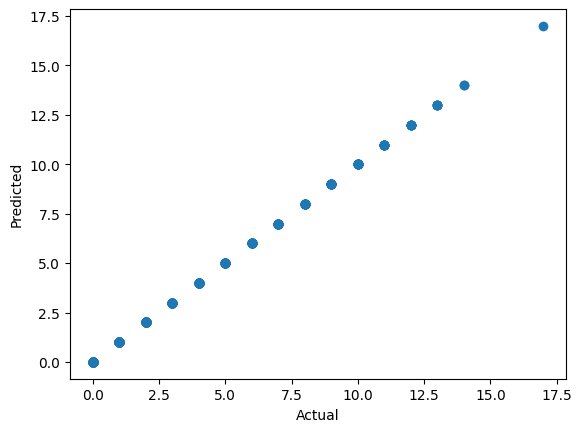

In [64]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Pregnancies'>

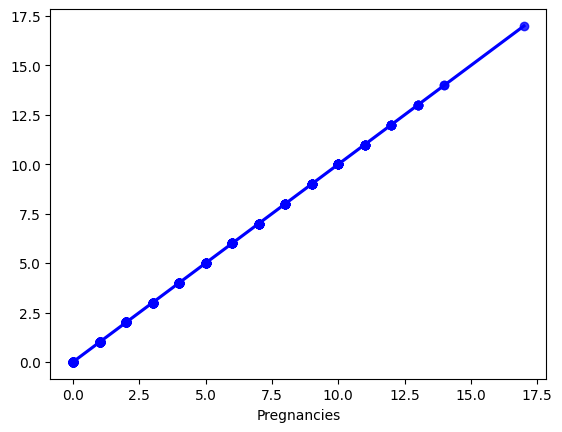

In [65]:
# plot regression model line
sns.regplot(x=y_test, y=y_pred, ci=None, color ='blue')

### Let's compare the metrics of two models

In [66]:
# create a metrics dataframe using metric values
metrics = {
    'Model': ['First', 'Second'],
    'MSE' : [mse, mse_2],
    'RMSE' : [rmse, rmse_2],
    'MAE' : [mae, mae_2],
    'R2' : [r2, r2_2]
    }

metrics_df = pd.DataFrame(data=metrics)

In [67]:
# compare the values
metrics_df

,Model,MSE,RMSE,MAE,R2
0,First,1.158282e+01,3.403355e+00,2.779696e+00,-0.002479
1,Second,6.468307e-31,8.042579e-16,4.990415e-16,1.000000
